Tokenize text to a new output:

In [1]:
from collections import defaultdict

def change_rare_words(input_corp, output_corp, threshold = 5):
    wordCounter = defaultdict(int)

    with open(input_corp , 'r' , encoding = 'ISO-8859-1') as input_file:
        for line in input_file:
            for word in line.split():
                wordCounter[word] += 1
    
    with open(input_corp, 'r' , encoding = 'ISO-8859-1') as input_file:
        with open(output_corp , 'w') as output_file: 
            for line in input_file:
                wordInLine = line.split()
                for word in wordInLine:                    
                    if wordCounter[word] < threshold:
                        output_file.write('__RARE__' + ' ')
                    else: 
                        output_file.write(word + ' ')
                output_file.write('\n')

Creates a dictionary from text (lowercase, numbers removed):

In [70]:
from collections import Counter
import string
import re
import gzip

LIMIT_OF_ROWS = 1000000

def create_dictionary(corp_source, coding='utf-8' , write_to_file = False ,words_output = None):
    #pattern = re.compile('/^[0-9]+(\\.[0-9]+)?$')
    wordCounter = Counter()
    limiter = 0
    
    print('Started creating dictionary.' + str(write_to_file) + ' ' + words_output)
    with open(corp_source , 'r', encoding = coding, errors='ignore') as input_file:
        for line in input_file:
            limiter += 1
            if limiter > LIMIT_OF_ROWS:
                break;
            for word in line.split():
                word = word.lower()
                for p in string.punctuation:
                    word = word.replace(p,"")
                word = re.sub('[\d]+','_NUM_',word)
                if word != '':
                    wordCounter[word] += 1
    
    if write_to_file is True:
        print('writing started.')
        with open(words_output , 'w', encoding = coding) as wordsoutput:
            for item in wordCounter.most_common():
                wordsoutput.write("{0} \t {1} \n".format(item[0] , item[1]))
    
    return wordCounter

Creates counter object from existing dictionary file:

In [3]:
from collections import Counter
import string

def create_counter_from_file(filename):
    word_counter = Counter()
    with open(filename, 'r') as input_file:
        for line in input_file:
            words = line.split('\t')
            word_counter[words[0]] = int(words[1])
    return word_counter

In [24]:
word_counter = create_dictionary('czech_tokenized' , 'czech_tok_words1')
print('Done!')

Done!


Counter({677528: 98.56180862980062, 100001: 94.52766987554035, 10001: 75.88703302390975, 1001: 48.60269299338006, 101: 31.452937390847524, 11: 15.665709125461404})


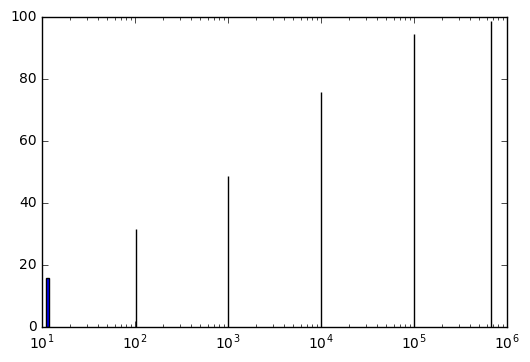

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = Counter()

def count_coverage(sample_dict, corp_dict):
    good = 0
    sum = 0
    target_size = 0
    for word in corp_dict.values():
        target_size += word
    
    limits = [10,100,1000,10000,100000,1000000,10000000]
    limit_index = 0
    current = 0
    for word in sample_dict.most_common():
        if word[0] in corp_dict.keys():
            good += corp_dict[word[0]]
        current += 1
        if current > limits[limit_index]:
            limit_index += 1
            #print('Current: ' + str(current) + ', words counted good: ' + str(good) + ' / ' + str(target_size) + ' , limit_index: ' + str(limit_index))
            results[current] = (good / target_size)*100
            if limit_index == 7:
                break;
    #print('Current: ' + str(current) + ', words counted good: ' + str(good) + ' / ' + str(target_size) + ' , limit_index: ' + str(limit_index))
    results[current] = (good / target_size)*100
    
'''
word_counter = create_dictionary('europarl-v7.sk-en.sk', 'utf-8' , True, 'sk_dict_1.txt')
print('Done with first.')
print(word_counter.most_common(30))
          
word_counter2 = create_dictionary('slovak.tok' , 'utf-8', True, 'sk_dict_2.txt')
print('Done with second.')
print(word_counter2.most_common(30))
'''

word_counter = create_counter_from_file('sk_dict_1.txt')
#print(word_counter.most_common(3))
word_counter2 = create_counter_from_file('sk_dict_2.txt')
#print(word_counter2.most_common(3))
count_coverage(word_counter2,word_counter )

print(results)
plt.bar(results.keys() , results.values())
plt.xscale('log')
plt.show()